### CruiseMaps with Data

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean

#using xarray for bathymetry data read
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import xarray as xa

extent=[-167.5, -150, 52.5, 60]

server_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSS111'
bathy = xa.open_dataset(server_url) 
bathy_sub = bathy.sel(latitude=slice(extent[3],extent[2]),longitude=slice(extent[0],extent[1]))

#bathy_sub.topo.plot(cmap=cmocean.cm.gray)

In [10]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12,12),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [11]:

server_url='http://downdraft.pmel.noaa.gov:8080/erddap'
e = ERDDAP(server=server_url)

cruise='CTD_nw1901_preliminary'

#build download url
download_url = e.get_download_url(
    dataset_id=cruise,
    protocol='tabledap',
    response='csv'
)
print(download_url)

http://downdraft.pmel.noaa.gov:8080/erddap/tabledap/CTD_nw1901_preliminary.csv?


In [12]:
from requests.exceptions import HTTPError


try:
    e = ERDDAP(server=server_url,
        protocol='tabledap',
        response='csv'
    )

    e.dataset_id=cruise
    
    
except HTTPError:
    print('Failed to generate url {}'.format(cruise))

    
try:
    df = e.to_pandas(index_col='time (UTC)',
                    parse_dates=True
                    )
except:
    print('Failed to ingest {}'.format(cruise))


In [13]:
df.groupby('station_id').first()

,latitude (degrees_north),longitude (degrees_east),pressure,S_42 (PSU),S_41 (PSU),fWS_973 (ugrams/l),T_28 (C),T2_35 (C),O_65 (um/kg),CTDOXY_4221 (um/kg),OST_62 (%),CTDOST_4220 (%),Tr_904 (percent),ATTN_55 (percent)
station_id,,,,,,,,,,,,,,
nw1901ctd001,NaN,NaN,2.0,31.1188,31.1672,2.8419,12.4219,12.4233,230.888,240.629,86.117,89.722,48.5369,2.8752
nw1901ctd002,NaN,NaN,2.0,31.8587,31.8626,1.5140,11.8408,11.8406,240.000,251.184,88.871,93.009,24.6833,5.2264
nw1901ctd003,NaN,NaN,0.0,31.8198,32.5445,2.2067,12.4592,12.6249,236.831,222.511,89.304,83.735,38.0629,-8.4951
nw1901ctd004,NaN,NaN,1.0,31.9513,31.5428,2.1455,11.5434,11.5442,241.445,242.737,88.646,89.381,53.7880,3.4810
nw1901ctd005,NaN,NaN,1.0,31.9717,31.9657,0.9633,11.6699,11.6695,244.464,241.013,90.265,88.994,83.2582,0.7329
nw1901ctd006,NaN,NaN,1.0,31.8892,31.8878,1.1515,11.7621,11.7625,274.861,271.075,101.630,100.232,81.5407,0.8163
nw1901ctd007,NaN,NaN,0.0,28.1737,27.7424,1.9530,10.9477,10.9296,239.026,242.771,84.345,85.898,-2.7251,11.8837
nw1901ctd008,NaN,NaN,1.0,31.0828,31.0332,2.7536,12.4364,12.4358,233.782,231.067,87.140,86.157,61.6421,1.9359
nw1901ctd009,NaN,NaN,1.0,30.7146,30.7132,1.9409,12.8697,12.8702,260.376,256.834,97.708,96.381,69.2635,1.4689


NameError: name 'merged_data' is not defined

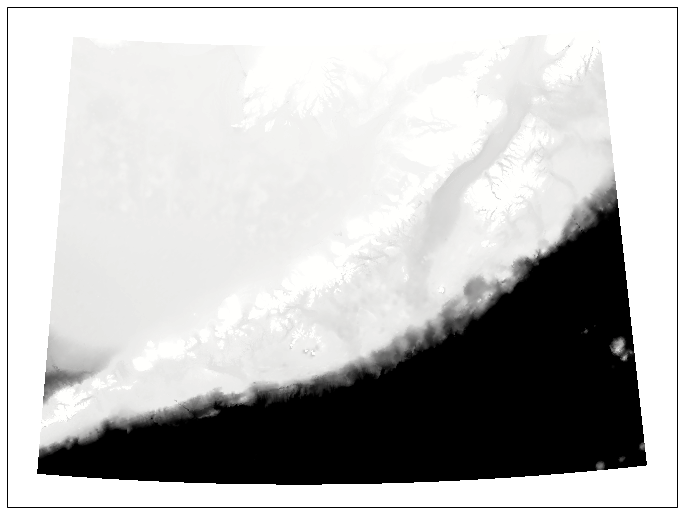

In [14]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

ax.pcolormesh(bathy_sub.longitude, bathy_sub.latitude, 
              bathy_sub.topo, cmap=cmocean.cm.gray,
              vmin=-3000,vmax=100,
              transform=transformation)
c = ax.scatter(merged_data.longitude, merged_data.latitude, s=10,
                               c=merged_data.t090C, cmap=cmocean.cm.thermal,
                               transform=transformation)
plt.colorbar(c)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)
        

fig.savefig('DY1905_BTMtemp.png',dpi=300)

In [ ]:
merged_data.to_csv(path + 'bottom_wlocation.csv')
merged_data